## 常用库导入及配置

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')# 画图风格
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# 感知机

In [3]:
from sklearn.linear_model import Perceptron # 感知机库

In [4]:
# 数据读取，各维名称为'one', 'two', 'three'
data = pd.read_table('mlp_data.txt', encoding='gb2312', delim_whitespace=True, names=['one', 'two', 'three', 'label'])

X = data.iloc[:, 0:3] # X为坐标
y = data[['label']]   # y为标签

### 库函数

In [5]:
# 损失阈值为1e-3,
clf = Perceptron(tol=1e-3)
clf.fit(X, y)
clf.score(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

1.0

+ 标准化处理对比

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
_X = sc.fit_transform(X)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(_X, y)
clf.score(_X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

1.0

### 自编 

In [8]:
def perception(X, y, lr=0.0002, epochs=5000):
    # 初始化权重，偏置
    w = np.zeros(X.shape[1])
    b = 0
    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            if yi * (np.dot(xi, w.reshape(-1, 1)) + b) <= 0: # 样本分类错误，更新参数
                w += lr * xi * yi
                b += lr * yi
                break
    print('w: {} b: {}'.format(w, b))
    return w, b

+ 对偶算法

In [9]:
def dual_perception(X, y, lr=0.0002, epochs=200):
    metric = np.dot(X, X.transpose())# 计算Gram矩阵，减少计算量
    alpha = np.zeros(len(X))# 实例点更新次数
    l = range(len(X))
    b = 0
    for epoch in range(epochs):
        for i in l:
            if y[i] * (np.sum([alpha[j] * y[j] * metric[i][j]
                               for j in l]) + b) <= 0: # 样本分类错误，更新参数
                alpha[i] += lr
                b += lr * y[i]
    w = sum([alpha[i] * y[i] * X[i] for i in l])
    
    print('alpha\n', alpha)
    print('w: {} b: {}'.format(w, b))
    return w, b

+ 精确度计算

In [10]:
def score(X, y, w, b):
    n = 0
    for xi, yi in zip(X, y):
        if yi * (np.dot(xi, w.reshape(-1, 1)) + b) > 0:
            n += 1
    print("accuracy: ", n / len(X))

### 可视化

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
def show_mlp_3d(w, b, data):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    x, y = np.meshgrid(x, y)
    z = []
    for xi, yi in zip(x, y):
        zi = (-w[0] * xi - w[1] * yi - b) / w[2]
        z.append(zi)
    z = np.array(z)

    surf = ax.plot_surface(
        x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    T = data[data['label'] == 1]
    F = data[data['label'] == -1]
    ax.scatter(T['one'], T['two'], T['three'], c='green')
    ax.scatter(F['one'], F['two'], F['three'], c='red')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

w: [-2.  2.  2.] b: [-1]
accuracy:  1.0


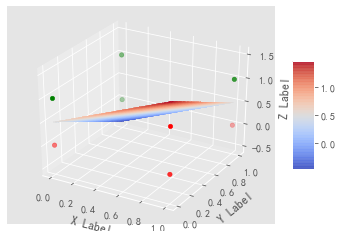

In [13]:
w, b = perception(X.values, y.values, lr=1, epochs=200)
score(X.values, y.values, w, b)

show_mlp_3d(w, b, data)

alpha
 [4. 1. 1. 0. 3. 0. 2. 0.]
w: [-2.  2.  2.] b: [-1]
accuracy:  1.0


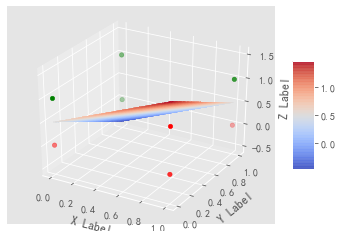

In [14]:
dual_w, dual_b = dual_perception(X.values, y.values, lr=1, epochs=200)
score(X.values, y.values, dual_w, dual_b)

show_mlp_3d(dual_w, dual_b, data)

# 决策树

In [15]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [16]:
# 读取贷款数据，第一列为索引
data = pd.read_csv("load.csv", index_col=0)

In [17]:
# 转化为字典格式
vec = DictVectorizer()
X = vec.fit_transform(data[['age', 'work', 'house', 'credit']].to_dict(orient="record"))
y = data['label']

In [18]:
# C4.5
dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(X, y.values)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

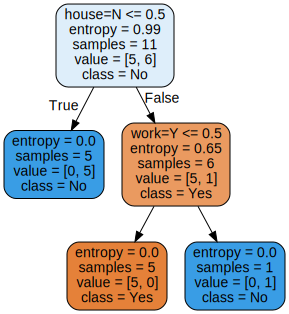

In [19]:
# 可视化
graph = Source(tree.export_graphviz(
                                    dct,
                                    out_file=None,
                                    rounded=True,proportion = False,
                                    feature_names = vec.feature_names_,
                                    precision  = 2,
                                    class_names=["Yes","No"],
                                    filled = True
                                   )
              )
display(graph)

# 二叉回归树（平方误差准则）

In [20]:
def findIndex(st, nums):
    if len(nums) <= 1: return None
    ans = []
    # 计算各个可能阈值对应的平方误差
    for i in range(len(nums)):
        l = sum(nums[:i]) / i if i != 0 else 0
        r = sum(nums[i:]) / (len(nums) - i)
        sl = sum([(nums[j] - l)**2 for j in range(i)])
        sr = sum([(nums[j] - r)**2 for j in range(i, len(nums))])
        ans.append(sl + sr)
    # 获取最小误差的索引
    index = ans.index(min(ans))
    # 输出
    print(nums[:index], ' <---> ',nums[index:])
    print('index', st + index, 'value', nums[index], 'min',
          min(ans))
    # 递归计算子树
    lIndex, rIndex = findIndex(st, nums[:index]), findIndex(
        st + index, nums[index:])

In [21]:
nums = [4.5, 4.75, 4.91, 5.34, 5.8, 7.05, 7.9, 8.23, 8.7, 9.0]
findIndex(0, nums)

[4.5, 4.75, 4.91, 5.34, 5.8]  <--->  [7.05, 7.9, 8.23, 8.7, 9.0]
index 5 value 7.05 min 3.358719999999999
[4.5, 4.75, 4.91]  <--->  [5.34, 5.8]
index 3 value 5.34 min 0.19120000000000004
[4.5]  <--->  [4.75, 4.91]
index 1 value 4.75 min 0.012800000000000023
[4.75]  <--->  [4.91]
index 2 value 4.91 min 0.0
[5.34]  <--->  [5.8]
index 4 value 5.8 min 0.0
[7.05, 7.9]  <--->  [8.23, 8.7, 9.0]
index 7 value 8.23 min 0.6625166666666666
[7.05]  <--->  [7.9]
index 6 value 7.9 min 0.0
[8.23]  <--->  [8.7, 9.0]
index 8 value 8.7 min 0.04500000000000021
[8.7]  <--->  [9.0]
index 9 value 9.0 min 0.0


# 集成学习

 `定义`:通过将多个单个学习器集成/组合在一起，使它们共同完成学习任务,集成学习能够把多个单一学习模型所获得的多个预测结果进行有机地组合，从而获得更加准确、稳定和强壮的最终结果。 

 `结构`:
 
 `分类`:
> Boosting:采用串行方式训练及分类其，各个分类器之间有依赖关系。基本思路是将基分类器层层叠加，每一层在训练的时候，对前一层基分类器分错的样本，给予更高的权重。测试时，根据跟层分类器的结果的加权得到最终结果。


> Bagging:与Boosting的串行训练方式不同，Bagging方法在训练过程中，各基分类器之间无强依赖甚至无依赖，可以进行并行训练。以随机森铃为例，为了让基分类器之间相互独立，将训练集分为若干子集。其更像是一种集体决策的过程，每个个体进行单独学习，最终通过投票的方式作出最后的决策。

+ Bagging的训练集是随机的，以独立同分布选取的训练样本子集训练弱分类器，而Boosting训练集的选择不是独立的，每一次选择的训练集都依赖于上一次学习的结果，根据错误率取样，因此Boosting的分类精度在大多数数据集中要优于Bagging，但是在有些数据集中，由于过拟合的原因，Boosting的精度会退化。
+ Bagging的每个预测函数(即弱假设)没有权重，而Boosting根据每一次训练的训练误差得到该次预测函数的权重；
+ Bagging的各个预测函数可以并行生成，而Boosting的只能顺序生成。

+ 从方差和偏差的角度再理解集成学习。
    + 基分类器的错误，是偏差和方差两种错误之和，偏差主要是由于分类器的表达你能力有限导致的系统性错误，表现在训练误差不收敛。方差是由于分类器对于样本分布过于敏感，导致在训练样本数较少时，产生过拟合。

    + Boosting 通过逐步聚焦于基分类器分错的样本，减少的集成分类器的偏差。
    + Bagging方法则是采用分而治之的策略，通过对训练样本多次采样，并分别训练处多个不同模型，然后做综合，来减少集成分类器的方差。假设所有基分类器出错的概率是独立的，在某个测试样本上，用简单多数投票方法来集成结果，超过多数基分类器出错的概率会随着基分类器的数量增加而下降。

+ Adaboost 实现

In [22]:
class AdaBoost:
    def __init__(self, n_estimators=50, learning_rate=1.0):
        self.clf_num = n_estimators
        self.learning_rate = learning_rate

    def init_args(self, datasets, labels):

        self.X = datasets
        self.Y = labels
        self.M, self.N = datasets.shape
        # 弱分类器数目和集合
        self.clf_sets = []
        # 初始化weights
        self.weights = [1.0/self.M] * self.M
        # G(x)系数 alpha
        self.alpha = []

    def _G(self, features, labels, weights):
        m = len(features)
        error = 100000.0  # 无穷大
        best_v = 0.0
        # 单维features
        features_min = min(features)
        features_max = max(features)
        n_step = (features_max - features_min +
                  self.learning_rate) // self.learning_rate
        # print('n_step:{}'.format(n_step))
        direct, compare_array = None, None
        for i in range(1, int(n_step)):
            v = features_min + self.learning_rate * i
            if v not in features:
                # 误分类计算
                compare_array_positive = np.array(
                    [1 if features[k] > v else -1 for k in range(m)])
                weight_error_positive = sum([weights[k] for k in range(
                    m) if compare_array_positive[k] != labels[k]])

                compare_array_nagetive = np.array(
                    [-1 if features[k] > v else 1 for k in range(m)])
                weight_error_nagetive = sum([weights[k] for k in range(
                    m) if compare_array_nagetive[k] != labels[k]])

                if weight_error_positive < weight_error_nagetive:
                    weight_error = weight_error_positive
                    _compare_array = compare_array_positive
                    _direct = 'positive'
                else:
                    weight_error = weight_error_nagetive
                    _compare_array = compare_array_nagetive
                    _direct = 'nagetive'
                    
                if weight_error < error:
                    error = weight_error
                    compare_array = _compare_array
                    best_v = v
                    direct = _direct
                    
        return best_v, direct, error, compare_array

    # 计算alpha
    def _alpha(self, error):
        return 0.5 * np.log((1-error)/error)

    # 规范化因子
    def _Z(self, weights, a, clf):
        return sum([weights[i]*np.exp(-1*a*self.Y[i]*clf[i]) for i in range(self.M)])

    # 权值更新
    def _w(self, a, clf, Z):
        for i in range(self.M):
            self.weights[i] = self.weights[i]*np.exp(-1*a*self.Y[i]*clf[i]) / Z

    # G(x)的线性组合
    def _f(self, alpha, clf_sets):
        pass

    def G(self, x, v, direct):
        if direct == 'positive':
            return 1 if x > v else -1
        else:
            return -1 if x > v else 1

    def fit(self, X, y):
        self.init_args(X, y)

        for epoch in range(self.clf_num):
            best_clf_error, best_v, clf_result = 100000, None, None
            # 根据特征维度, 选择误差最小的
            for j in range(self.N):
                features = self.X[:, j]
                # 分类阈值，分类误差，分类结果
                v, direct, error, compare_array = self._G(
                    features, self.Y, self.weights)

                if error < best_clf_error:
                    best_clf_error = error
                    best_v = v
                    final_direct = direct
                    clf_result = compare_array
                    axis = j
                if best_clf_error == 0:
                    break
                    
            a = self._alpha(best_clf_error)
            self.alpha.append(a)
            self.clf_sets.append((axis, best_v, final_direct))
            Z = self._Z(self.weights, a, clf_result)
            self._w(a, clf_result, Z)
#             print('classifier:{}/{} error:{:.3f} v:{} direct:{} a:{:.5f}'.format(epoch+1, self.clf_num, error, best_v, final_direct, a))
#             print('weight:{}'.format(self.weights))
#             print('\n')
        print(self.clf_sets)
        
    def predict(self, feature):
        result = 0.0
        for i, clf_set in enumerate(self.clf_sets):
            axis, clf_v, direct = clf_set
            f_input = feature[axis]
            result += self.alpha[i] * self.G(f_input, clf_v, direct)
        # sign
        return 1 if result > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            feature = X_test[i]
            if self.predict(feature) == y_test[i]:
                right_count += 1

        return right_count / len(X_test)

In [23]:
X = np.arange(10).reshape(10, 1)
y = np.array([1, 1, 1, -1, -1, -1, 1, 1, 1, -1])

clf = AdaBoost(n_estimators=3, learning_rate=0.5)
clf.fit(X, y)

[(0, 2.5, 'nagetive'), (0, 8.5, 'nagetive'), (0, 5.5, 'positive')]


In [24]:
clf.score(X, y)

1.0

# EM算法

In [25]:
class EM(object):
    def __init__(self, init_p):
        self.A, self.B, self.C = init_p

    def expect(self, i):  # E步
        pt = self.A * (self.B**data[i]) * (1 - self.B)**(1 - data[i])
        pf = (1 - self.A) * (self.C**data[i]) * (1 - self.C)**(1 - data[i])
        return pt / (pt + pf)

    def fit(self, data, f=1e-6):
        l = len(data)
        print('init ', self.A, self.B, self.C)
        for d in range(l):
            # M步
            p = np.array([self.expect(i) for i in range(l)])
            pa = 1. / l * sum(p)
            pb = p.dot(data) / sum(p)
            pc = (1 - p).dot(data) / sum(1 - p)
            print('{} / {} A: {:.4f}, B: {:4f} C: {:.4f}'.\
                format(d+1, l, pa, pb, pc))
            if np.max([self.A-pa, self.B-pb, self.C-pc]) < f:
                break
            self.A = pa
            self.B = pb
            self.C = pc

In [26]:
data = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
em = EM(init_p=[.5, .5, .5])
f = em.fit(data)

init  0.5 0.5 0.5
1 / 10 A: 0.5000, B: 0.500000 C: 0.5000


# SVM && ME

## 数据集读入

In [28]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris_x = iris.drop('species', axis=1)
iris_y = iris['species']

In [29]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_x = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_y = pd.DataFrame(wine.target, columns=['label'])['label']

## 实现

### 支持向量机

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [31]:
from sklearn import metrics


def svm_solve(x, y, C_l=0.01, C_r=1):
    x_train, x_test, y_train, y_test = train_test_split(x, y)  # 切分训练集，测试集
    titles = ['Linear Kernel', 'Polynomial Kernel', 'Gaussian Kernel']
    fig = plt.figure(figsize=(10, 10), dpi=144)
    C_space = np.linspace(C_l, C_r, 100)[1:]
    for i, kernel in enumerate(('linear', 'poly', 'rbf')):
        accuracy = []
        for C in C_space:
            clf = svm.SVC(C=C, kernel=kernel)
            clf.fit(x_train, y_train)
            y_predict = clf.predict(x_test)
            score = metrics.accuracy_score(y_test, y_predict)
            accuracy.append(score)
        plt.subplot(2, 2, i + 1)
        plt.title(titles[i])
        plt.xlabel('C')
        plt.ylabel('精确度')
        plt.plot(C_space, accuracy)
    plt.show()

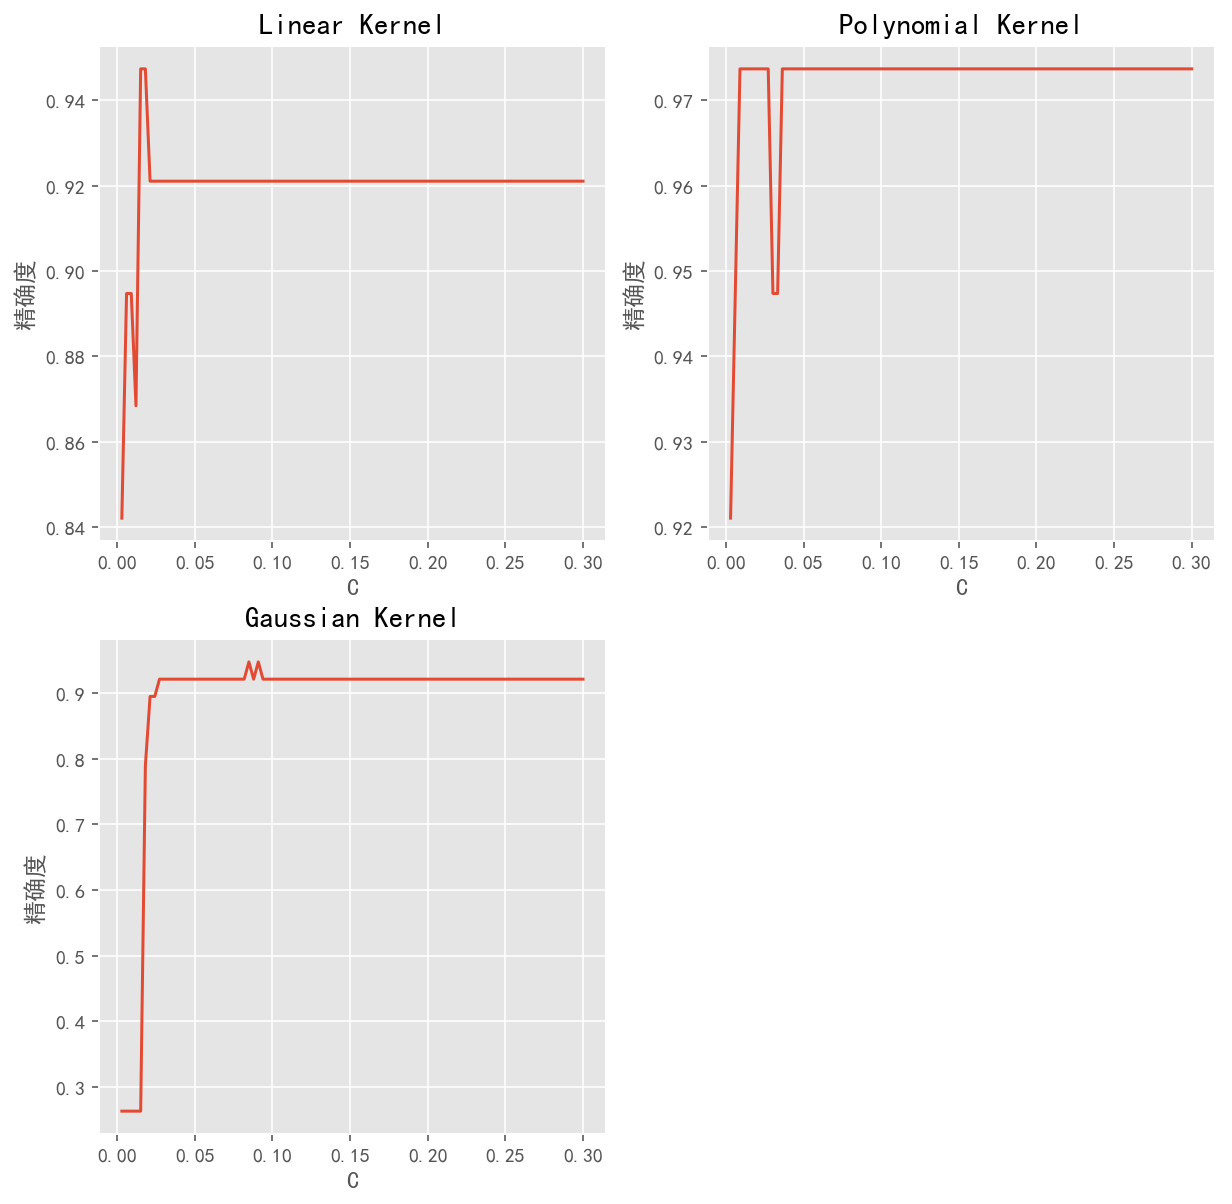

In [32]:
svm_solve(iris_x.values, iris_y.values, 0, 0.3)

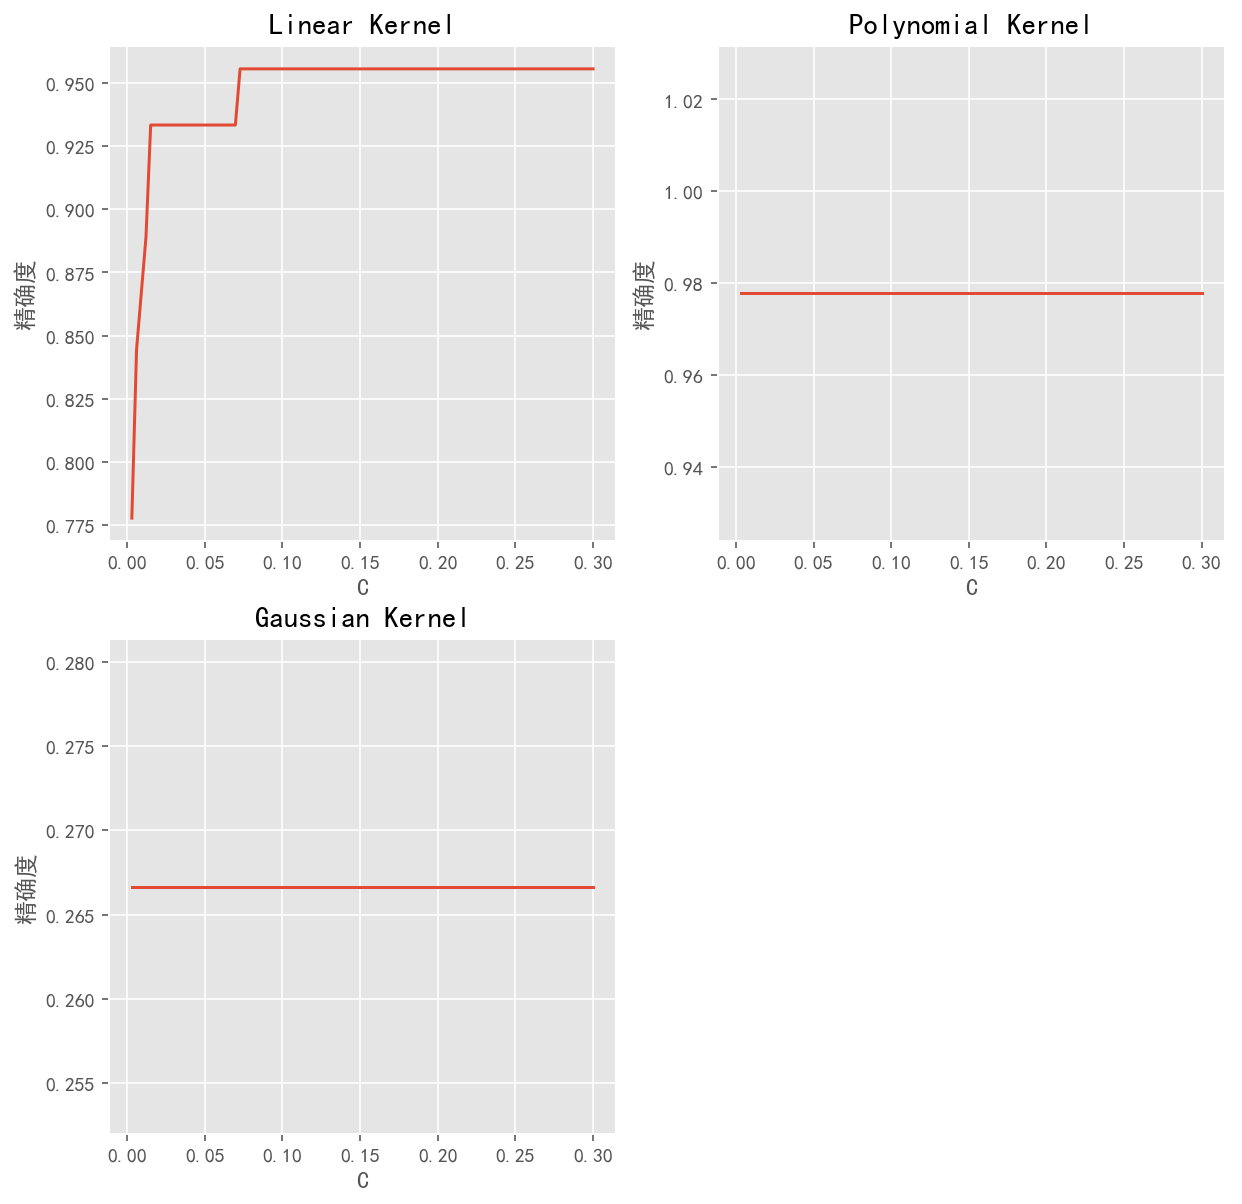

In [33]:
svm_solve(wine_x.values, wine_y.values, C_l=0, C_r=0.3)

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [35]:
def Guassian(X, y, C_l, C_r, g_l, g_r):
    x_train, x_test, y_train, y_test = train_test_split(X, y)  # 切分训练集，测试集
    C_space = np.linspace(C_l, C_r, 50)[1:]
    g_space = np.linspace(g_l, g_r, 50)[1:]
    accuracy = []
    C_space, g_space = np.meshgrid(C_space, g_space)
    for c, g in zip(np.ravel(C_space), np.ravel(g_space)):
        clf = svm.SVC(C=c, kernel='rbf', gamma=g)
        clf.fit(x_train, y_train)
        y_predict = clf.predict(x_test)
        score = metrics.accuracy_score(y_test, y_predict)
        accuracy.append(score)
    accuracy = np.array(accuracy).reshape(C_space.shape)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(
        C_space,
        g_space,
        accuracy,
        cmap=cm.coolwarm,
        linewidth=0,
        antialiased=False,
        alpha=0.6)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('惩罚系数C')
    ax.set_ylabel('gamma')
    ax.set_zlabel('accuracy')
    plt.show()

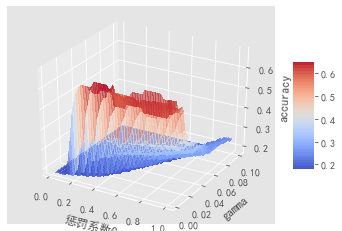

In [36]:
Guassian(wine_x.values, wine_y.values, C_l=0, C_r=1, g_l=0, g_r=0.1)

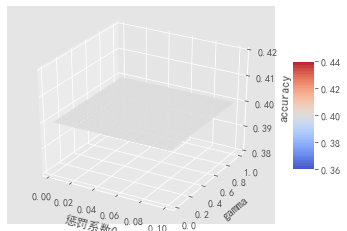

In [37]:
Guassian(wine_x.values, wine_y.values, C_l=0, C_r=0.1, g_l=0, g_r=1)

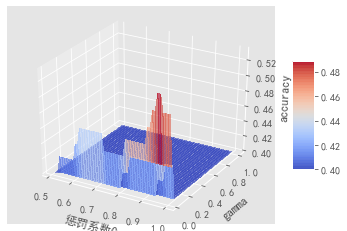

In [38]:
Guassian(wine_x.values, wine_y.values, C_l=0.5, C_r=1, g_l=0, g_r=1)

In [39]:
data = pd.read_table('wmdata.txt', encoding='gb2312', delim_whitespace=True, index_col=0)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 0, '密度')

Text(0, 0.5, '含糖率')

Text(0.5, 1.0, 'Linear Kernel')

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 0, '密度')

Text(0, 0.5, '含糖率')

Text(0.5, 1.0, 'Polynomial Kernel with Degree=3')

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 0, '密度')

Text(0, 0.5, '含糖率')

Text(0.5, 1.0, 'Gaussian Kernel with $\\gamma=0.5$')

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 0, '密度')

Text(0, 0.5, '含糖率')

Text(0.5, 1.0, 'Gaussian Kernel with $\\gamma=0.1$')

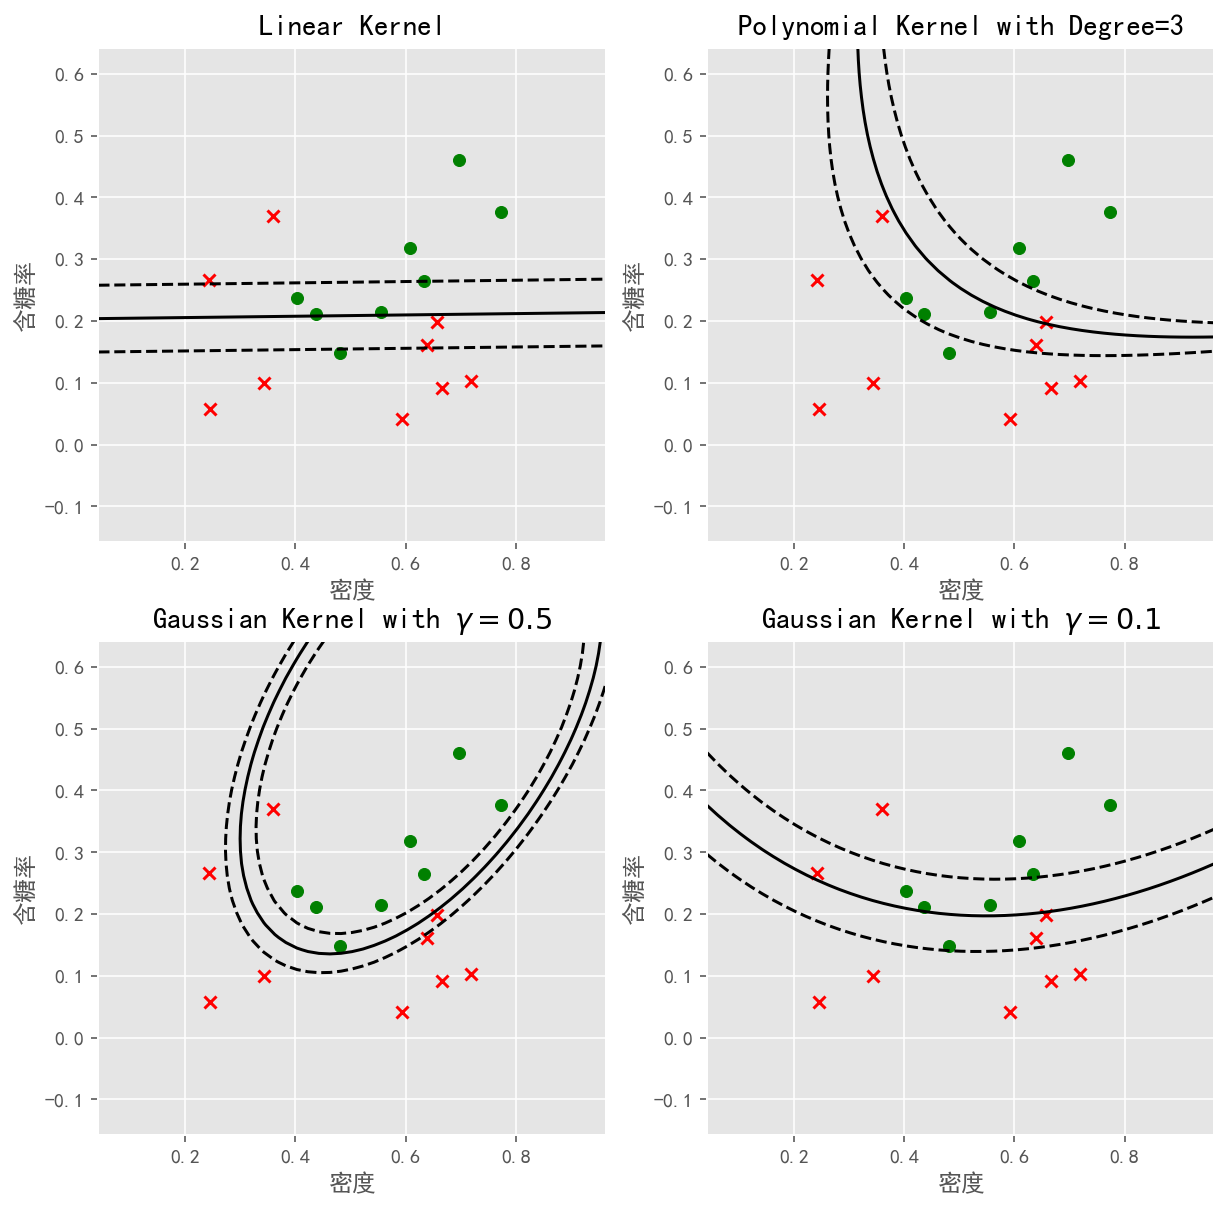

In [40]:
clf_linear = svm.SVC(C=1000, kernel='linear')
clf_poly = svm.SVC(C=1000, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1000, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1000, kernel='rbf', gamma=0.1)
#创建画布
fig = plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
#子图标题
titles = [
    'Linear Kernel', 'Polynomial Kernel with Degree=3',
    'Gaussian Kernel with $\gamma=0.5$', 'Gaussian Kernel with $\gamma=0.1$'
]
#提取数据
X, y = data[['密度', '含糖率']].values, data['好瓜'].values

for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)  #训练
    subfig = plt.subplot(2, 2, i + 1)
    plt.scatter(
        data[data['好瓜'] == '是']['密度'],
        data[data['好瓜'] == '是']['含糖率'],
        c='green')
    plt.scatter(
        data[data['好瓜'] == '否']['密度'],
        data[data['好瓜'] == '否']['含糖率'],
        c='red',
        marker='x')
    plt.xlabel('密度')
    plt.ylabel('含糖率')

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    XX, YY = np.meshgrid(
        np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contour(
        XX,
        YY,
        Z,
        colors=['k', 'k', 'k'],
        linestyles=['--', '-', '--'],
        levels=[-.5, 0, .5])
    plt.title(titles[i])
plt.show()

### 最大熵

#### 库函数

In [41]:
from nltk.classify import MaxentClassifier

In [42]:
def nltk_max_ent(X, y):
    def train_and_test(data, algorithm, X_test, y_test):
        clf = MaxentClassifier.train(data, algorithm)
        correct = 0
        for x, y in zip(X_test, y_test):
            predict = clf.prob_classify(x)
            p = []
            for yi in np.unique(y_test.values):
                p.append((predict.prob(yi), yi))
            p.sort(reverse=True)
            if (p[0][1] == y):
                correct += 1
        print('{} : accuracy : {:.4}'.format(algorithm,
                                             1. * correct / len(y_test)))

    X = X.to_dict('records')
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    data = [(xi, yi) for xi, yi in zip(X_train, y_train)]
    train_and_test(data, 'GIS', X_test, y_test)
    train_and_test(data, 'IIS', X_test, y_test)

In [43]:
nltk_max_ent(iris_x, iris_y)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.366
             2          -0.46605        0.946
             3          -0.29457        0.955
             4          -0.22007        0.964
             5          -0.17845        0.982
             6          -0.15169        0.982
             7          -0.13290        0.982
             8          -0.11890        0.982
             9          -0.10800        0.991
            10          -0.09923        0.991
            11          -0.09201        0.991
            12          -0.08593        1.000
            13          -0.08073        1.000
            14          -0.07623        1.000
            15          -0.07228        1.000
            16          -0.06878        1.000
            17          -0.06566        1.000
            18          -0.06285        1.000
            19          -0.06030        1.000
 

            80          -0.03460        1.000
            81          -0.03424        1.000
            82          -0.03388        1.000
            83          -0.03352        1.000
            84          -0.03318        1.000
            85          -0.03284        1.000
            86          -0.03251        1.000
            87          -0.03219        1.000
            88          -0.03187        1.000
            89          -0.03156        1.000
            90          -0.03125        1.000
            91          -0.03095        1.000
            92          -0.03066        1.000
            93          -0.03037        1.000
            94          -0.03009        1.000
            95          -0.02982        1.000
            96          -0.02955        1.000
            97          -0.02928        1.000
            98          -0.02902        1.000
            99          -0.02876        1.000
         Final          -0.02851        1.000
IIS : accuracy : 0.9211


In [44]:
nltk_max_ent(wine_x, wine_y)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.271
             2          -0.21751        1.000
             3          -0.09992        1.000
             4          -0.06292        1.000
             5          -0.04555        1.000
             6          -0.03560        1.000
             7          -0.02918        1.000
             8          -0.02470        1.000
             9          -0.02141        1.000
            10          -0.01889        1.000
            11          -0.01690        1.000
            12          -0.01529        1.000
            13          -0.01396        1.000
            14          -0.01284        1.000
            15          -0.01189        1.000
            16          -0.01107        1.000
            17          -0.01036        1.000
            18          -0.00973        1.000
            19          -0.00917        1.000
 

            74          -0.01890        1.000
            75          -0.01865        1.000
            76          -0.01840        1.000
            77          -0.01817        1.000
            78          -0.01793        1.000
            79          -0.01771        1.000
            80          -0.01749        1.000
            81          -0.01727        1.000
            82          -0.01706        1.000
            83          -0.01686        1.000
            84          -0.01666        1.000
            85          -0.01646        1.000
            86          -0.01627        1.000
            87          -0.01608        1.000
            88          -0.01590        1.000
            89          -0.01572        1.000
            90          -0.01555        1.000
            91          -0.01538        1.000
            92          -0.01521        1.000
            93          -0.01505        1.000
            94          -0.01489        1.000
            95          -0.01473  

#### 自编

In [45]:
from collections import defaultdict

In [46]:
class MaxEntropy(object):
    def __init__(self):
        self.X = []
        self.Y = set()
        self.w = []
        self.pairs = defaultdict(int)

    def _initparams(self, X, Y):
        self.n = X.shape[0]
        self.M = np.max([len(xi) for xi in X])

        for x, y in zip(X, Y):
            if len(x) < 2:
                continue
            self.X.append(x)
            self.Y.add(y)

            for xi in x:
                self.pairs[(xi, y)] += 1

        self.pairs_size = len(self.pairs)
        self.w = np.zeros(self.pairs_size)
        self._calcu_sample_ep()

    def train(self, X, Y, epochs=200, eps=1e-2):
        self._initparams(X, Y)
        delta_w = None
        for epoch in range(epochs):
            self._calcu_model_ep()
            delta_w = ([
                np.log(self.sample_ep[i] / self.model_ep[i])
                for i in range(self.pairs_size)
            ]) / self.M
            self.w += delta_w
            if self._convergence(delta_w, eps):
                print("误差范围内")
                break

    def _calcu_sample_ep(self):
        self.sample_ep = np.zeros(self.pairs_size)
        for i, pair in enumerate(self.pairs):
            self.sample_ep[i] += self.pairs[pair] / self.n
            self.pairs[pair] = i

    def _calcu_model_ep(self):
        self.model_ep = np.zeros(self.pairs_size)
        for x in self.X:
            prob = self._condictional_p(x)
            for xi in x:
                for pyx, yi in prob:
                    if (xi, yi) in self.pairs:
                        id = self.pairs[(xi, yi)]
                        self.model_ep[id] += 1. / self.pairs_size * pyx

    def _condictional_p(self, x):
        p = [self._calcu_condictional_p(x, yi) for yi in self.Y]
        return list(zip(p / sum(p), self.Y))

    def _calcu_condictional_p(self, x, yi):
        sum = 0.0
        for xi in x:
            if (xi, yi) in self.pairs:
                sum += self.w[self.pairs[(xi, yi)]]
        return np.exp(sum)

    def predict(self, x):
        p = self._condictional_p(x)
        p.sort(reverse=True)
        return p

    def score(self, X, y):
        correct = 0
        for xi, yi in zip(X, y):
            if self.predict(xi)[0][1] == yi:
                correct += 1
#             else:
#                 print('features:{} label:{}'.format(xi, yi))
        print("accuracy: {:.4}".format(1. * correct / len(y)))

    def _convergence(self, delta_w, eps):
        return np.max(delta_w) <= eps

In [47]:
maxEnt = MaxEntropy()
x_train, x_test, y_train, y_test = train_test_split(iris_x.values, iris_y)
maxEnt.train(x_train, y_train, epochs=1000, eps=1e-2)
maxEnt.score(x_test, y_test)

accuracy: 0.8158


In [48]:
def to_str(data):
    q = data
    for i, feature in enumerate(data.columns):
        data[feature] = data[feature].apply(lambda x: str(i)+'_'+str(x))
    return data

In [49]:
wine_x_str = to_str(wine_x)
x_train, x_test, y_train, y_test = train_test_split(wine_x_str.values, wine_y)

In [50]:
maxEnt = MaxEntropy()
maxEnt.train(x_train, y_train, epochs=200, eps=1e-8)
maxEnt.score(x_test, y_test)

accuracy: 0.8


# 隐马尔可夫模型

In [51]:
class HiddenMarkov(object):
    def forward(self, Q, V, A, B, O, PI):
        '''
            前向算法
        '''
        N, M = len(Q), len(O)
        alpha = np.zeros((M, N))
        for t in range(M):
            index = V.index(O[t])
            if t == 0:
                alpha[t] = PI * B.T[index]
            else:
                alpha[t] = [np.dot(alpha[t-1], A.T[j])
                            for j in range(N)] * B.T[index]
        p = np.sum(alpha[M-1])
        print('Forward matric:\n', alpha)
        print('P(O|model) = ', p)
        return alpha

    def backward(self, Q, V, A, B, O, PI):
        '''
            后向算法
        '''
        N, M = len(Q), len(O)
        betas = np.zeros((M, N))
        betas[M-1] = [1, ] * N
        for t in range(M-2, -1, -1):
            index = V.index(O[t+1])
            betas[t] = [np.dot(betas[t+1] * A[j], B.T[index])
                        for j in range(N)]
        p = np.dot(PI * B.T[V.index(O[0])], betas[0])
        print('Backward matric:\n', betas)
        print('P(O|model) = ', p[0])
        return betas

    def viterbi(self, Q, V, A, B, O, PI):
        '''
            维特比算法求最优路径
        '''
        N, M = len(Q), len(O)
        state = np.zeros((M, N), dtype=np.int8)
        delta = np.zeros((M, N))

        for t in range(M):
            index = V.index(O[t])
            if t == 0:
                delta[t] = PI * B.T[index]
            else:
                p = np.array([(delta[t-1] * A.T[j] * B[j][index])
                              for j in range(N)])
                state[t] = (p.argmax(axis=1))
                delta[t] = p.max(axis=1)

        print('Possibility matric :\n', delta)
        print("Last most possible state matric :\n", state)

        self.optimal_path(delta, state, M, N)
        self.show_sequence(delta, state, M, N)

    def calcu_p(self, Q, V, A, B, O, PI, t, s):
        '''计算P(i_t = q_s|Q, lambda)
            params:
                t：时刻
                s：状态
        '''
        alpha = self.forward(Q, V, A, B, O, PI)
        betas = self.backward(Q, V, A, B, O, PI)
        print("alpha\n{}\nbetas\n{}".format(alpha, betas))
        t -= 1
        s -= 1
        ans = alpha[t][s] * betas[t][s] / (alpha[t].dot(betas[t]))
        print('P(i{} = q{} | O, lambda): {}'.format(t+1, s+1, ans))

    def optimal_path(self, delta, state, M, N):
        '''
            求最优路径
        '''
        path = []
        end = delta.argmax(axis=1)[-1]
        path.append(end)
        best = end
        for row in state[-1:0:-1]:
            best = row[best]
            path.append(best)
        path = np.array(path[::-1]) + 1
        print('Optimal path is ', path)
        return path

    def show_sequence(self, pmatric, state, M, N):
        '''
            可视化
        '''
        plt.figure(figsize=(15, 15))
        np.set_printoptions(precision=4)
        for i in range(M):
            for j in range(N):
                plt.scatter(i+1, j+1)                   # 画点
                plt.annotate(str(round(pmatric[i][j], 10)), xy=(   # 标注概率
                    i+1, j+1), xytext=(i+1, j+1.2))

        for i in range(M-1, 0, -1):
            for j in range(N):
                plt.plot([i+1, i], [j+1, state[i][j]+1])    # 连线

        plt.xticks(range(pmatric.shape[0]+2))     # 横坐标范围
        plt.yticks(range(pmatric.shape[1]+2))     # 纵坐标范围
        plt.title("Path")
        plt.xlabel("Time")
        plt.ylabel('State')
        plt.show()

'\nQ:状态集合\nV:所有可能观测的集合\nA:状态转移概率矩阵\nB:观测概率矩阵\nO:观测序列\nPi:初始状态概率矩阵\n'

Possibility matric :
 [[1.00000000e-01 1.20000000e-01 3.50000000e-01]
 [3.50000000e-02 4.20000000e-02 6.30000000e-02]
 [8.75000000e-03 8.40000000e-03 2.64600000e-02]
 [2.64600000e-03 2.11680000e-03 1.11132000e-02]
 [1.11132000e-03 1.33358400e-03 2.00037600e-03]
 [2.77830000e-04 2.66716800e-04 8.40157920e-04]
 [8.40157920e-05 1.00818950e-04 1.51228426e-04]
 [2.10039480e-05 3.02456851e-05 2.72211166e-05]]
Last most possible state matric :
 [[0 0 0]
 [2 2 2]
 [0 1 2]
 [2 2 2]
 [2 2 2]
 [0 1 2]
 [2 2 2]
 [0 1 2]]
Optimal path is  [3 3 3 3 3 3 2 2]


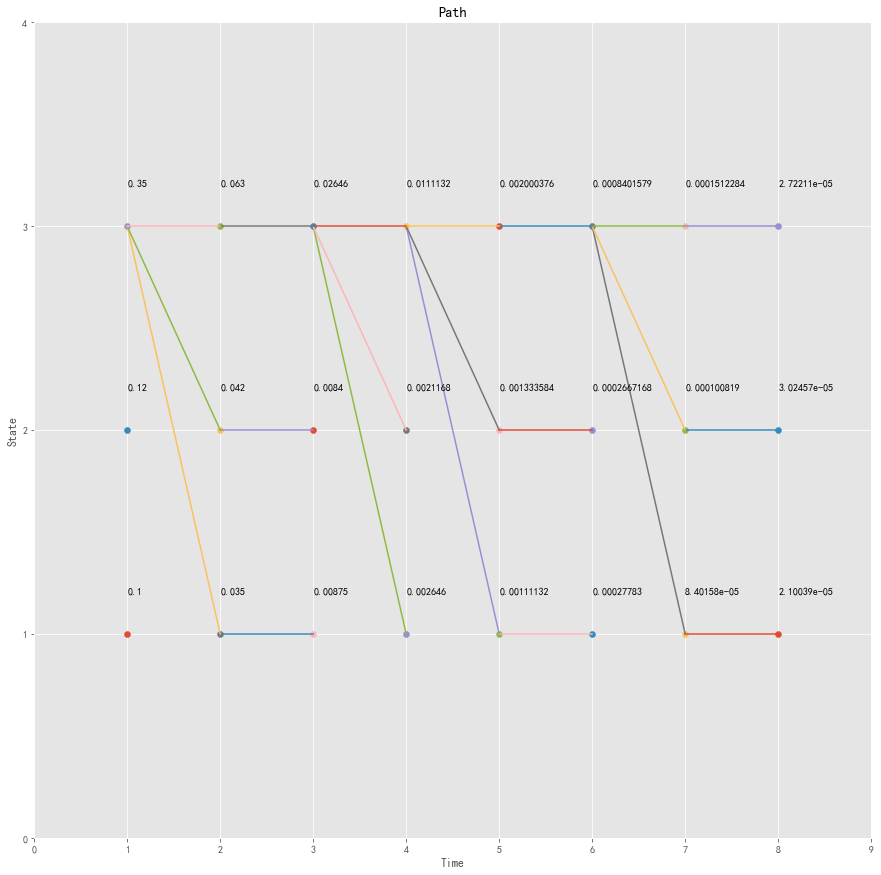

Forward matric:
 [[0.1    0.12   0.35  ]
 [0.078  0.084  0.0822]
 [0.0403 0.0265 0.0681]
 [0.0209 0.0124 0.0436]
 [0.0114 0.0102 0.0111]
 [0.0055 0.0034 0.0093]
 [0.0028 0.0025 0.0025]
 [0.0013 0.0012 0.0009]]
P(O|model) =  0.0034767094492823996
Backward matric:
 [[0.0063 0.0068 0.0058]
 [0.0148 0.0123 0.0157]
 [0.0256 0.0234 0.0268]
 [0.0459 0.0528 0.0428]
 [0.1055 0.1009 0.1119]
 [0.1861 0.2415 0.1762]
 [0.43   0.51   0.4   ]
 [1.     1.     1.    ]]
P(O|model) =  0.0034767094492824
alpha
[[0.1    0.12   0.35  ]
 [0.078  0.084  0.0822]
 [0.0403 0.0265 0.0681]
 [0.0209 0.0124 0.0436]
 [0.0114 0.0102 0.0111]
 [0.0055 0.0034 0.0093]
 [0.0028 0.0025 0.0025]
 [0.0013 0.0012 0.0009]]
betas
[[0.0063 0.0068 0.0058]
 [0.0148 0.0123 0.0157]
 [0.0256 0.0234 0.0268]
 [0.0459 0.0528 0.0428]
 [0.1055 0.1009 0.1119]
 [0.1861 0.2415 0.1762]
 [0.43   0.51   0.4   ]
 [1.     1.     1.    ]]
P(i3 = q1 | O, lambda): 0.2964750117651477


In [52]:
"""
Q:状态集合
V:所有可能观测的集合
A:状态转移概率矩阵
B:观测概率矩阵
O:观测序列
Pi:初始状态概率矩阵
"""
# 习题一
# Q = [1, 2, 3]
# V = ['red', 'white']
# A = np.array([[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]])
# B = np.array([[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]])
# O = ['red', 'white', 'red', 'white']
# PI = np.array([[0.2, 0.4, 0.4]])

# 习题二
Q = [1, 2, 3]
V = ['red', 'white']
A = np.array([[0.5, 0.1, 0.4], [0.3, 0.5, 0.2], [0.2, 0.2, 0.6]])
B = np.array([[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]])
O = ['red', 'white', 'red', 'red', 'white', 'red', 'white', 'white']
PI = np.array([[0.2, 0.3, 0.5]])

HMM = HiddenMarkov()
HMM.viterbi(Q, V, A, B, O, PI)
HMM.calcu_p(Q, V, A, B, O, PI, 3, 1)

# 线性链条件随机场

In [53]:
from itertools import product


class CRF(object):
    def encode(self, start, stop, time, state):
        # 获得所有可能序列
        s = list(
            map(lambda x: list(x),
                list(product(list(range(state)), repeat=time - 1))))
        for si in s:
            si.insert(0, start - 1)
            si.append(stop - 1)
        return np.array(s, dtype=np.int8)

    def forward(self, start, stop, *args):
        '''
            前向算法
        '''
        M = np.array(args)
        time, state, _ = M.shape

        sequences = self.encode(start, stop, time, state)
        p = 1 + np.zeros(len(sequences))
        for i, s in enumerate(sequences):
            for j in range(len(s) - 1):
                p[i] *= M[j][s[j]][s[j + 1]]
        print('sum', sum(p))
        p /= sum(p)

        for i, pi in enumerate(p):
            print('{} --> {:.4f}'.format(sequences[i] + 1, pi))

        print("The most possible sequence: ", sequences[p.argmax()] + 1)

In [54]:
M1 = [[0, 0], [.3, .7]]
M2 = [[.3, .7], [.7, .3]]
M3 = [[.5, .5], [.6, .4]]
M4 = [[0, 1], [0, 1]]
crf = CRF()
crf.forward(2, 2, M1, M2, M3, M4)

sum 0.9999999999999999
[2 1 1 1 2] --> 0.0450
[2 1 1 2 2] --> 0.0450
[2 1 2 1 2] --> 0.1260
[2 1 2 2 2] --> 0.0840
[2 2 1 1 2] --> 0.2450
[2 2 1 2 2] --> 0.2450
[2 2 2 1 2] --> 0.1260
[2 2 2 2 2] --> 0.0840
The most possible sequence:  [2 2 1 1 2]
